In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from astropy.io import fits
import petitRADTRANS.retrieval.plot_style as ps
import scicomap as sc
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
colour_dict = {"b":fixed_cmap(3/6),
              "c":fixed_cmap(2/6),
              "d":fixed_cmap(1/6),
              "e":fixed_cmap(0/6)}
colour_dict_2 = {"c":'goldenrod',
                 "d":'darkred',
                 "e":'navy'}

Using pRT Plotting style!


In [2]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["c","d","e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["PACO_FLASSEUR_HR8799c_2016.txt"]
files["d"] = ["HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799d_GPIH_PYNPOINT_spectrum.fits","HR8799d_GPIH_ANDROMEDA_spectrum.fits"]
files["e"] = ["HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799e_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799e_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["PACO"] = "F20"
labels["ZURLO"] = "Z16"
colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["PACO"] = "grey"
colours["ZURLO"] = "k"


HR8799d_SPHEREYJH_PYNPOINT_spectrum.fits
HR8799d_SPHEREYJH_ANDROMEDA_spectrum.fits


/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_36273/3485125725.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/HR8799_SPHERE_DataComp_2023_v2.pdf",bbox_inches = 'tight')
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_36273/3485125725.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("plots/HR8799_SPHERE_DataComp_2023_v2.pdf",bbox_inches = 'tight')
/Users/nasedkin/anaconda3/envs/pRTUpdate/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


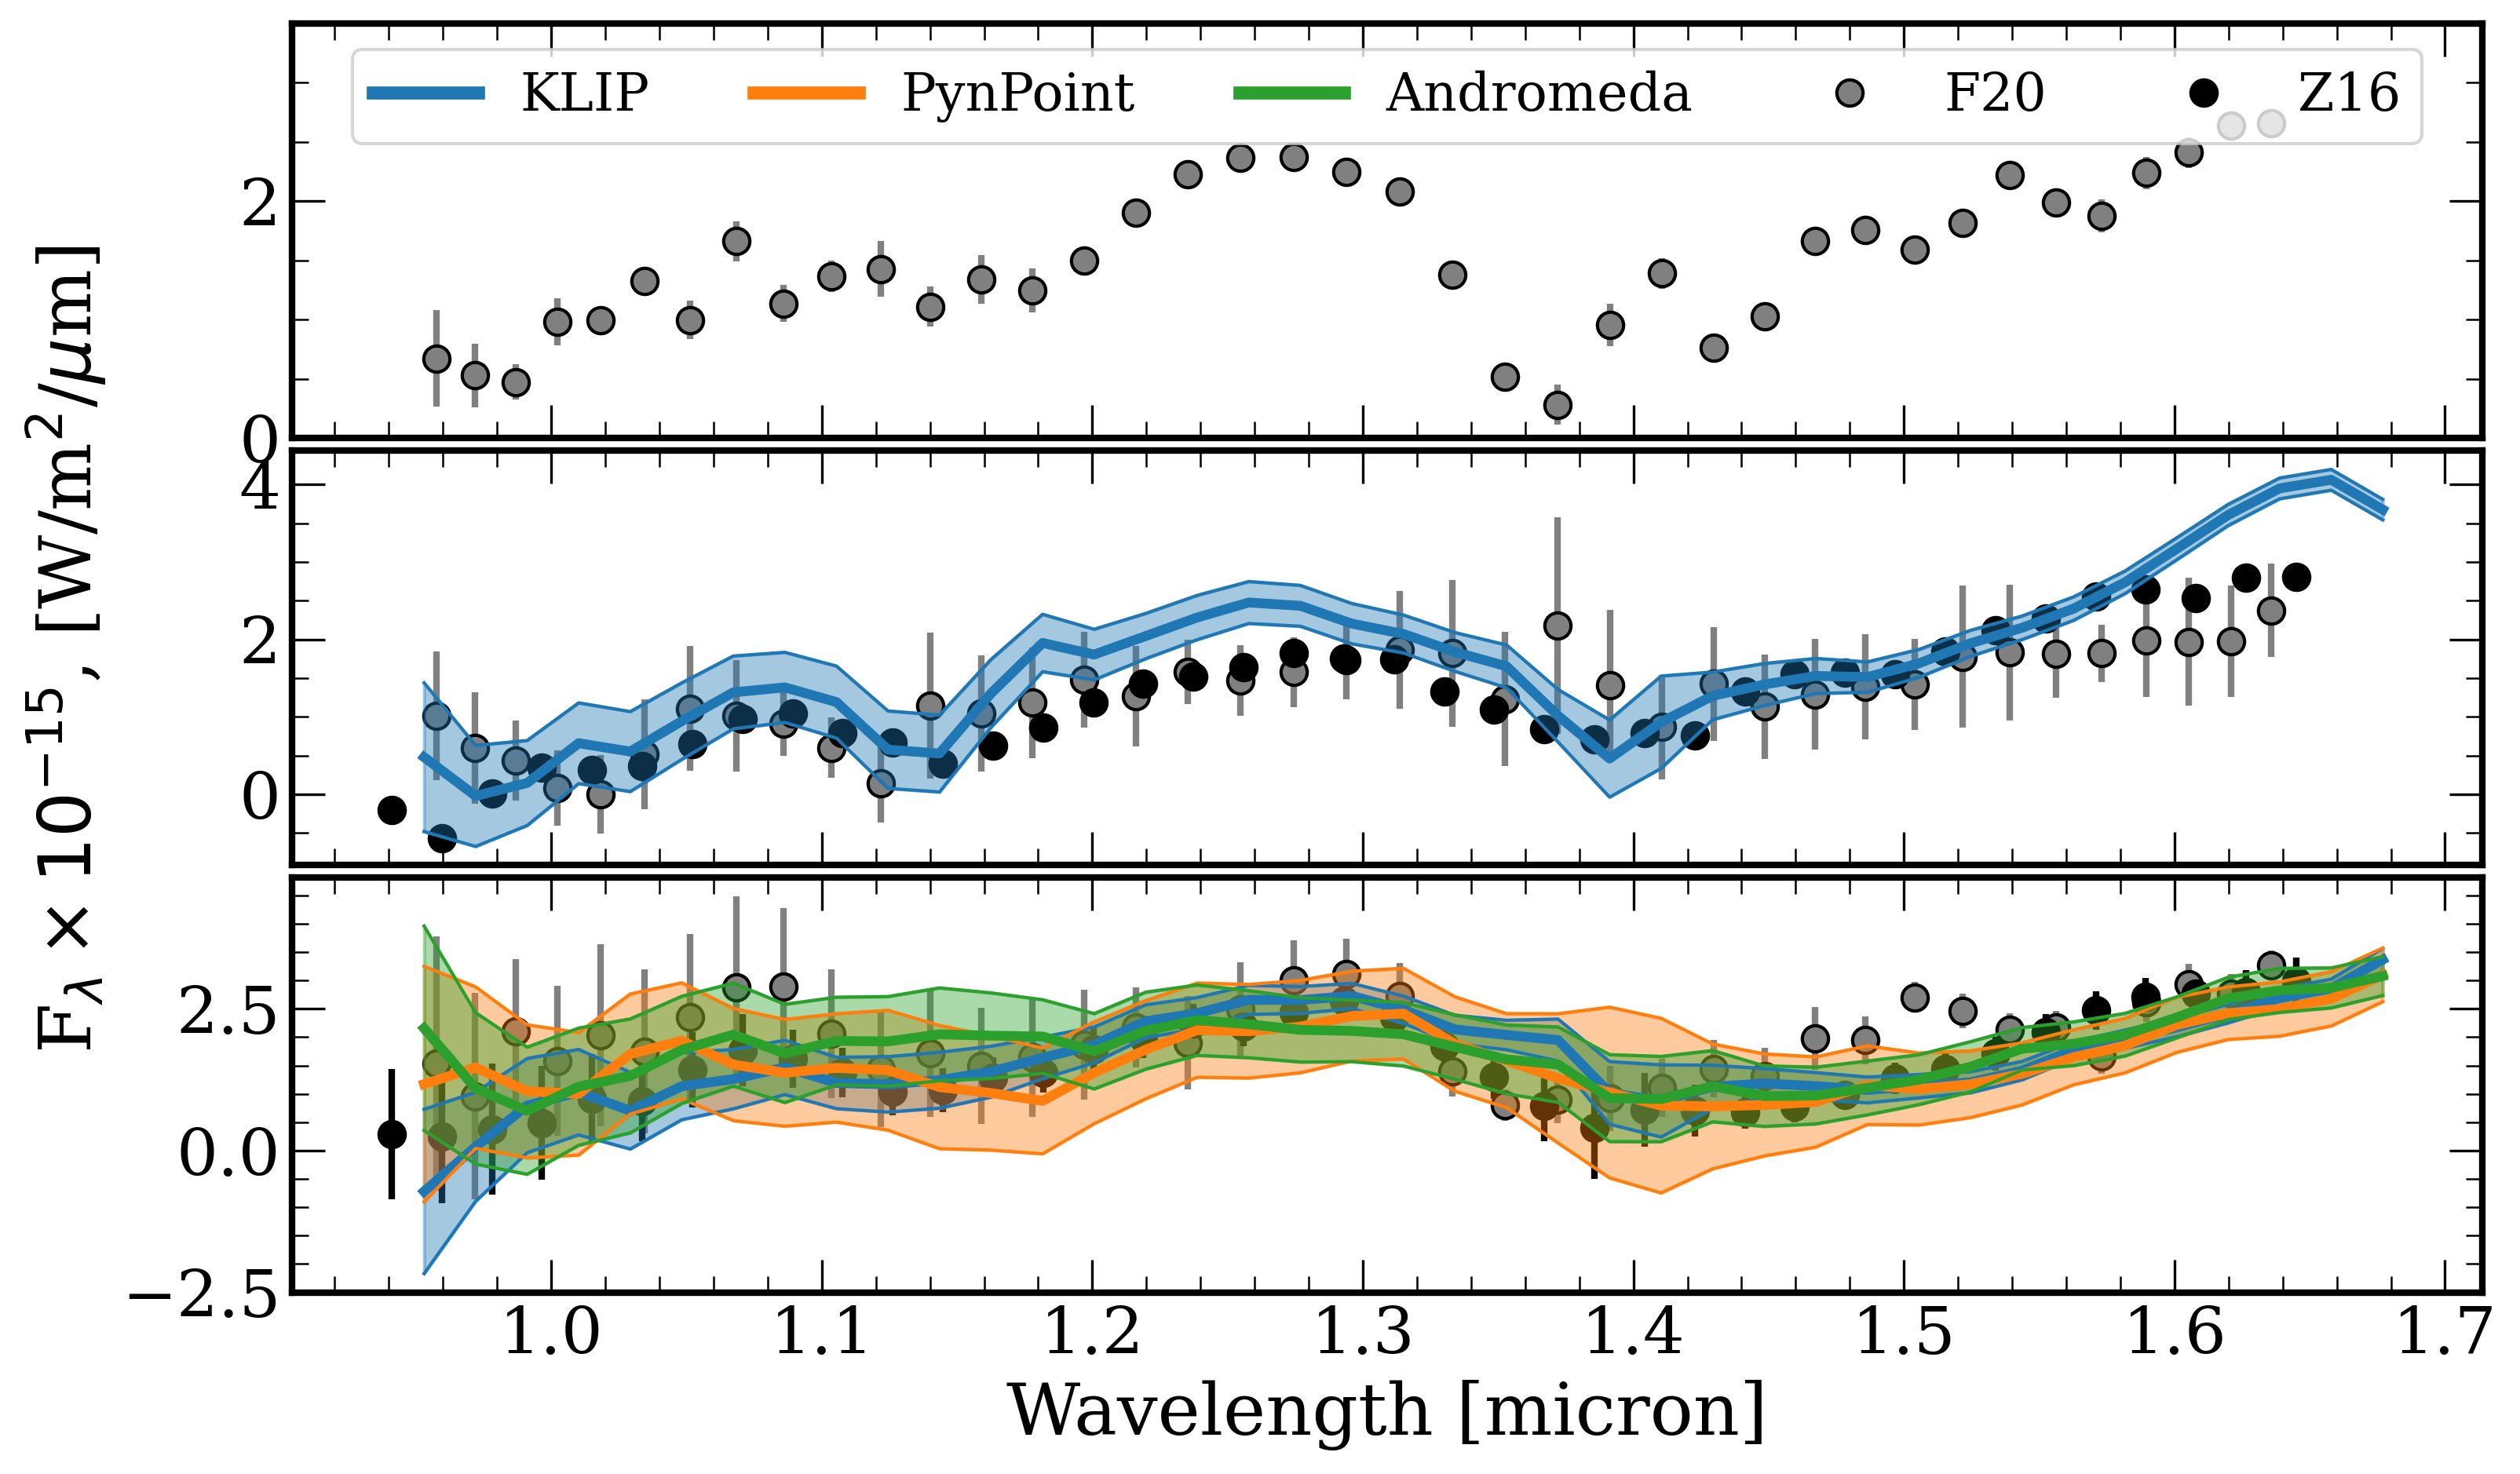

In [17]:
fig, axes = plt.subplots(figsize = (12,7), 
                         nrows = 3, 
                         sharex = True,
                         gridspec_kw = {'hspace':0.03})
ax = axes.flatten()
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        scale = 1
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
            scale = (41.2925/10)**2
        elif "PYN" in f.upper():
            name = "PYNPOINT"
            scale = 60/8
        elif "PACO" in f.upper():
            name = "PACO"
        else:
            name = "ZURLO"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                print(f)
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))
        else:
            if "PACO" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
        if name == "PACO" or name == "ZURLO":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'o',
                        color = colours[name],
                        zorder = 0)
        else:
            ax[i].fill_between(wlen, 
                        (flux-(err*scale))/1e-15 ,
                        (flux+(err*scale))/1e-15,
                        label = None, 
                        color = colours[name],
                        alpha = 0.4)
            ax[i].plot(wlen, 
                    (flux)/1e-15, 
                    color = colours[name],
                    label = labels[name],
                    linewidth = 3)
            ax[i].plot(wlen, 
                    (flux-(err*scale))/1e-15, 
                    color = colours[name],
                    linewidth = 1)
            ax[i].plot(wlen, 
                    (flux+(err*scale))/1e-15, 
                    color = colours[name],
                    linewidth = 1)

eand = fits.open("/Users/nasedkin/Documents/HR8799/final_outputs/HR8799e_SPHEREYJH_ANDROMEDA_spectrum.fits")["SPECTRUM"].data
#ax[2].errorbar(eand["WAVELENGTH"], eand["FLUX"]/1e-15, yerr = np.sqrt(np.diag(eand["COVARIANCE"]))/1e-15 ,elinewidth = 3)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=colours["KLIP"], lw=4),
                Line2D([0], [0], color=colours["PYNPOINT"], lw=4),
                Line2D([0], [0], color=colours["ANDROMEDA"], lw=4),   
                Line2D([0], [0], color=colours["PACO"], lw=0, marker = 'o'),
                Line2D([0], [0], color=colours["ZURLO"], lw=0, marker = 'o')
                ]
ax[0].legend(custom_lines, list(labels.values()),
             fontsize=16,
             loc = 'upper center',
             ncol = 5)
ax[0].set_ylim(-1e-13,3.5)
ax[2].set_xlabel("Wavelength [micron]", fontsize = 22)
fig.text(0.03, 0.5, r'F$_{\lambda}\times10^{-15}$, [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 22)
plt.savefig("plots/HR8799_SPHERE_DataComp_2023_v2.pdf",bbox_inches = 'tight')

In [103]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["c","d","e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["HR8799c_GPIH_KLIP_2023_spectrum.fits","HR8799c_GPIH_PYNPOINT_spectrum.fits","HR8799c_GPIH_ANDROMEDA_spectrum.fits","HR8799c_GPI_2018.dat"]
files["d"] = ["HR8799d_GPIH_KLIP_2023_spectrum.fits","HR8799d_GPIH_PYNPOINT_spectrum.fits","HR8799d_GPIH_ANDROMEDA_spectrum.fits","HR8799d_GPI_2018.dat"]
files["e"] = ["HR8799e_GPIH_KLIP_2023_spectrum.fits","HR8799e_GPIH_PYNPOINT_spectrum.fits","HR8799e_GPIH_ANDROMEDA_spectrum.fits","HR8799e_GPI_2018.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["GREEN"] = "G18"
colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["GREEN"] = "k"

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


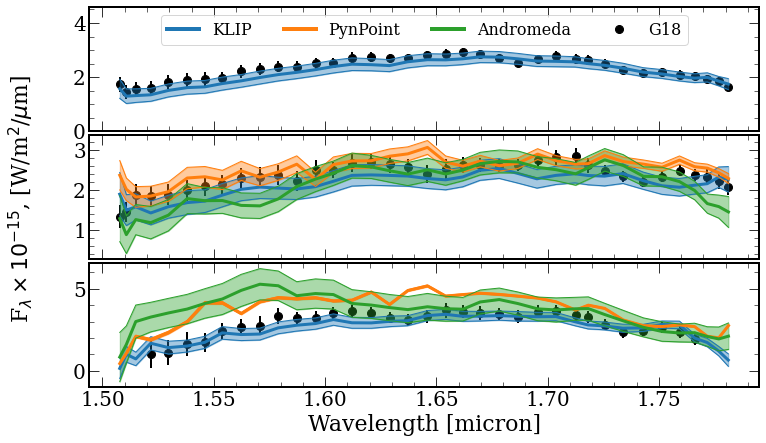

In [104]:


fig, axes = plt.subplots(figsize = (12,7), 
                         nrows = 3, 
                         sharex = True,
                         gridspec_kw = {'hspace':0.03})
ax = axes.flatten()
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
        elif "PYN" in f.upper():
            name = "PYNPOINT"
        else:
            name = "GREEN"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))

            wlen = wlen[np.where(wlen<1.8)]
            flux = flux[np.where(wlen<1.8)]
            err = err[np.where(wlen<1.8)]
        else:
            if "GREEN" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
        if name == "GREEN" or name == "ZURLO":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'o',
                        color = colours[name],
                        zorder = 0)
        else:
            ax[i].fill_between(wlen, 
                        (flux-err)/1e-15,
                        (flux+err)/1e-15,
                        label = None, 
                        color = colours[name],
                        alpha = 0.4)
            ax[i].plot(wlen, 
                    (flux)/1e-15, 
                    color = colours[name],
                    label = labels[name],
                    linewidth = 3)
            ax[i].plot(wlen, 
                    (flux-err)/1e-15, 
                    color = colours[name],
                    linewidth = 1)
            ax[i].plot(wlen, 
                    (flux+err)/1e-15, 
                    color = colours[name],
                    linewidth = 1)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=colours["KLIP"], lw=4),
                Line2D([0], [0], color=colours["PYNPOINT"], lw=4),
                Line2D([0], [0], color=colours["ANDROMEDA"], lw=4),   
                Line2D([0], [0], color=colours["GREEN"], lw=0, marker = 'o')
                ]

ax[0].legend(custom_lines, list(labels.values()),
             fontsize=16,
             loc = 'upper center',
             ncol = 4)
ax[0].set_ylim(-1e-13,4.6)
ax[2].set_xlabel("Wavelength [micron]", fontsize = 22)
fig.text(0.03, 0.5, r'F$_{\lambda}\times10^{-15}$, [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 22)
plt.savefig("plots/HR8799_GPI_DataComp_2023_v1.pdf",bbox_inches = 'tight')

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


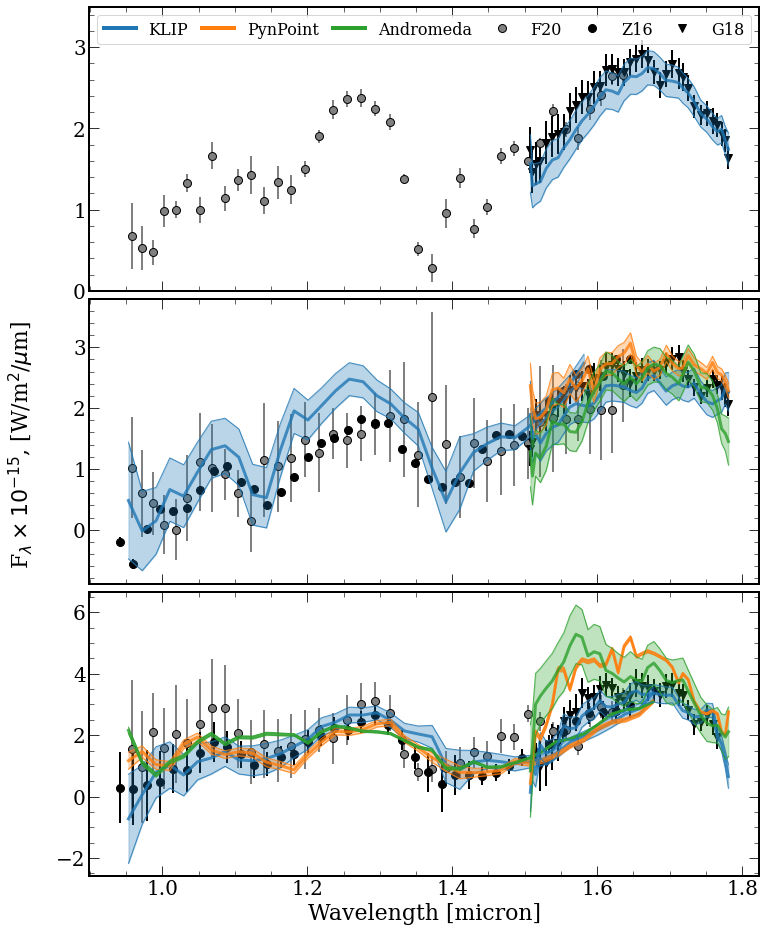

In [133]:
fig, axes = plt.subplots(figsize = (12,16), 
                         nrows = 3, 
                         sharex = True,
                         gridspec_kw = {'hspace':0.03})
ax = axes.flatten()

data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["c","d","e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["PACO_FLASSEUR_HR8799c_2016.txt"]
files["d"] = ["HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799d_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799d_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799d_2016.txt","HR8799d_SPHERE_2016.dat"]
files["e"] = ["HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799e_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799e_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["PACO"] = "F20"
labels["ZURLO"] = "Z16"
labels["GREEN"] = "G18"

colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["PACO"] = "grey"
colours["ZURLO"] = "k"

for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
        elif "PYN" in f.upper():
            name = "PYNPOINT"
        elif "PACO" in f.upper():
            name = "PACO"
        else:
            name = "ZURLO"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))
        else:
            if "PACO" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
        if name == "PACO" or name == "ZURLO":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'o',
                        color = colours[name],
                        zorder = 0)
        else:
            if planet == "d":
                wlen = wlen[:-5]
                flux = flux[:-5]
                err = err[:-5]
            ax[i].fill_between(wlen, 
                        (flux-err)/1e-15,
                        (flux+err)/1e-15,
                        label = None, 
                        color = colours[name],
                        alpha = 0.3)
            ax[i].plot(wlen, 
                    (flux)/1e-15, 
                    color = colours[name],
                    label = labels[name],
                    alpha = 0.8,
                    linewidth = 3)
            ax[i].plot(wlen, 
                    (flux-err)/1e-15, 
                    color = colours[name],
                    alpha = 0.8,
                    linewidth = 1)
            ax[i].plot(wlen, 
                    (flux+err)/1e-15, 
                    color = colours[name],
                    alpha = 0.8,
                    linewidth = 1)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=colours["KLIP"], lw=4),
                Line2D([0], [0], color=colours["PYNPOINT"], lw=4),
                Line2D([0], [0], color=colours["ANDROMEDA"], lw=4),   
                Line2D([0], [0], color=colours["PACO"], lw=0, marker = 'o'),
                Line2D([0], [0], color=colours["ZURLO"], lw=0, marker = 'o'),
                Line2D([0], [0], color='k', lw=0, marker = 'v')
                ]
ax[0].legend(custom_lines, list(labels.values()),
             fontsize=16,
             loc = 'upper center',
             mode='expand',
             ncol = 6)
ax[0].set_ylim(-1e-13,3.5)
ax[2].set_xlabel("Wavelength [micron]", fontsize = 22)
fig.text(0.03, 0.5, r'F$_{\lambda}\times10^{-15}$, [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 22)







data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["c","d","e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["HR8799c_GPIH_KLIP_2023_spectrum.fits","HR8799c_GPIH_PYNPOINT_spectrum.fits","HR8799c_GPIH_ANDROMEDA_spectrum.fits","HR8799c_GPI_2018.dat"]
files["d"] = ["HR8799d_GPIH_KLIP_2023_spectrum.fits","HR8799d_GPIH_PYNPOINT_spectrum.fits","HR8799d_GPIH_ANDROMEDA_spectrum.fits","HR8799d_GPI_2018.dat"]
files["e"] = ["HR8799e_GPIH_KLIP_2023_spectrum.fits","HR8799e_GPIH_PYNPOINT_spectrum.fits","HR8799e_GPIH_ANDROMEDA_spectrum.fits","HR8799e_GPI_2018.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["GREEN"] = "G18"
colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["GREEN"] = "k"
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
        elif "PYN" in f.upper():
            name = "PYNPOINT"
        else:
            name = "GREEN"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))

            wlen = wlen[np.where(wlen<1.8)]
            flux = flux[np.where(wlen<1.8)]
            err = err[np.where(wlen<1.8)]
        else:
            if "GREEN" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
        if name == "GREEN":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'v',
                        color = colours[name],
                        zorder = 0)
        else:
            ax[i].fill_between(wlen, 
                        (flux-err)/1e-15,
                        (flux+err)/1e-15,
                        label = None, 
                        color = colours[name],
                        alpha = 0.3)
            ax[i].plot(wlen, 
                    (flux)/1e-15, 
                    color = colours[name],
                    label = labels[name],
                    alpha = 0.8,
                    linewidth = 3)
            ax[i].plot(wlen, 
                    (flux-err)/1e-15, 
                    color = colours[name],
                    alpha = 0.8,
                    linewidth = 1)
            ax[i].plot(wlen, 
                    (flux+err)/1e-15, 
                    color = colours[name],
                    alpha = 0.8,
                    linewidth = 1)
plt.savefig("plots/HR8799_DataComp_2023_v2.pdf",bbox_inches = 'tight')

18.239904371747464
19.001003878618572


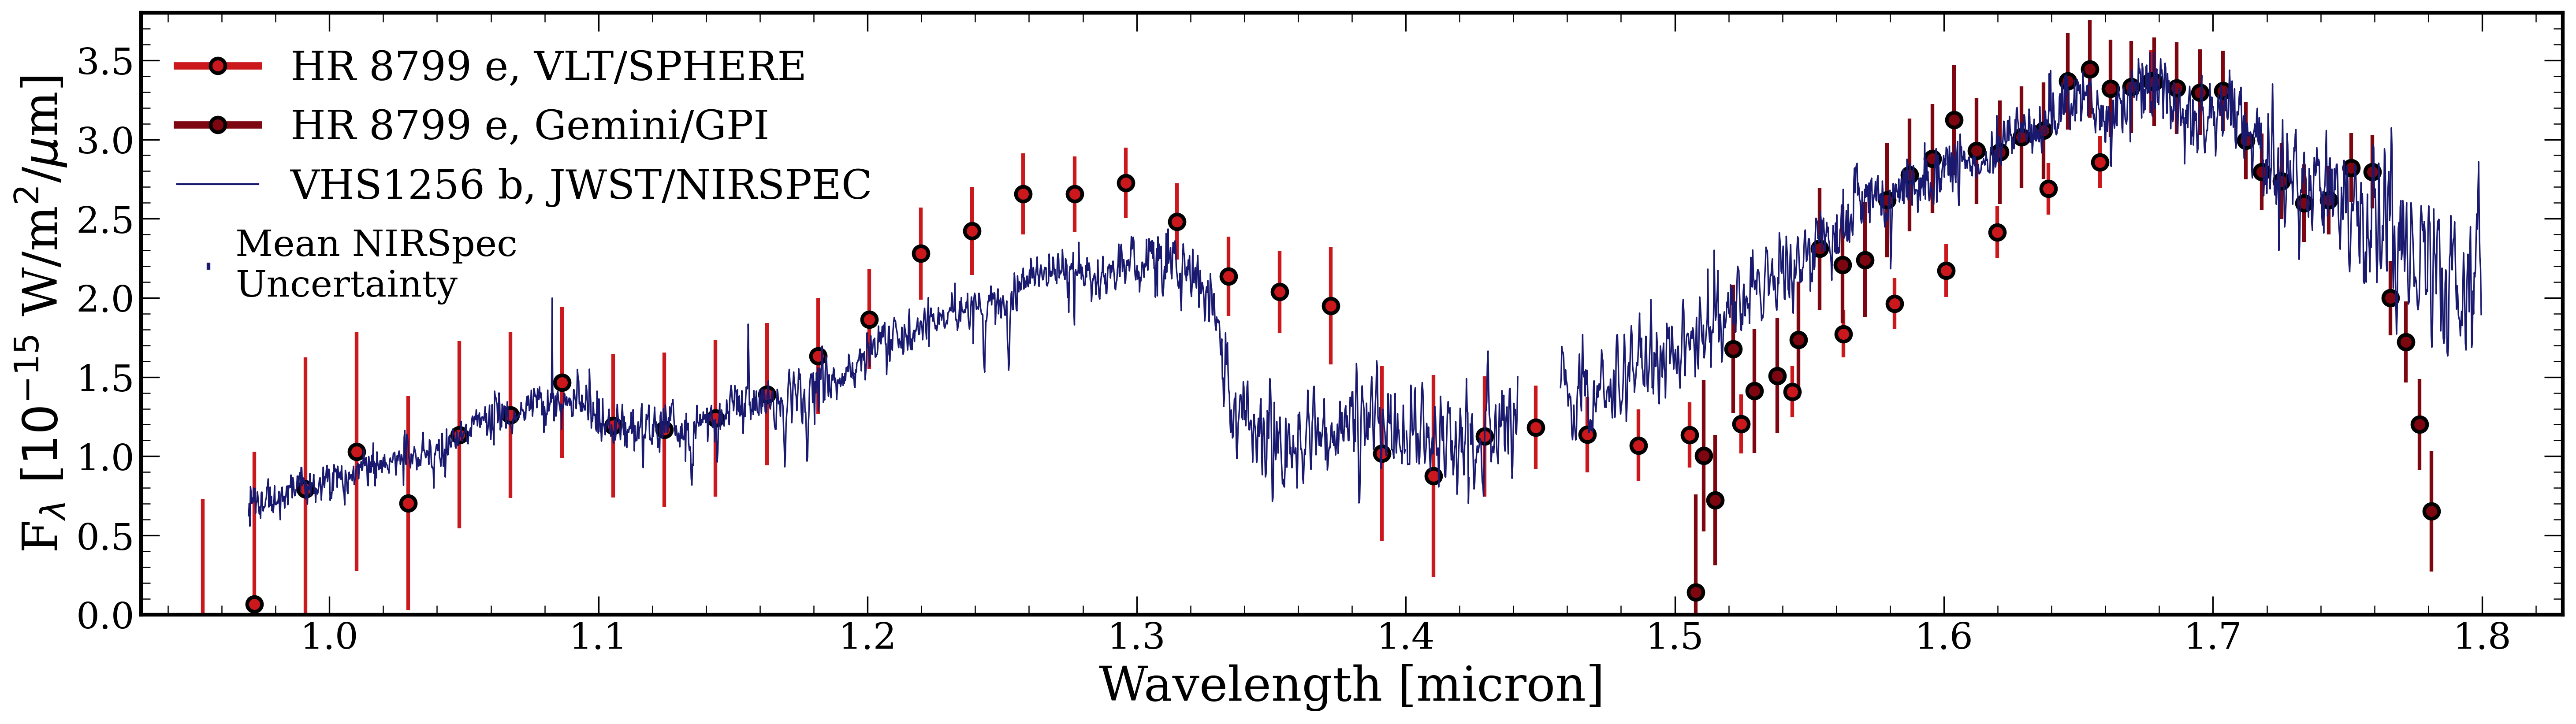

In [9]:
fig, ax = plt.subplots(figsize = (20,6))

data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["PACO_FLASSEUR_HR8799c_2016.txt"]
files["d"] = ["HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799d_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799d_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799d_2016.txt","HR8799d_SPHERE_2016.dat"]
files["e"] = ["HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799e_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799e_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["PACO"] = "F20"
labels["ZURLO"] = "Z16"
labels["GREEN"] = "G18"

colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["PACO"] = "grey"
colours["ZURLO"] = "k"

qual_map = sc.ScicoSequential(cmap='Reds')
fixed_cmap = qual_map.get_mpl_color_map()
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
            continue
        elif "PYN" in f.upper():
            name = "PYNPOINT"
            continue
        elif "PACO" in f.upper():
            name = "PACO"
        else:
            name = "ZURLO"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))
        else:
            if "PACO" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
        if name == "PACO" or name == "ZURLO":
            continue
        else:
            if planet == "d":
                wlen = wlen[:-5]
                flux = flux[:-5]
                err = err[:-5]
            spherr = err/1e-15
            sphwlen = wlen
            ax.errorbar(wlen,
                        flux/1e-15 ,
                        yerr=err/1e-15 ,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'o',
                        color = fixed_cmap(0.75),
                        markeredgewidth = 2,
                        alpha = 1,
                        zorder = 0)

data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["HR8799c_GPIH_KLIP_2023_spectrum.fits","HR8799c_GPIH_PYNPOINT_spectrum.fits","HR8799c_GPIH_ANDROMEDA_spectrum.fits","HR8799c_GPI_2018.dat"]
files["d"] = ["HR8799d_GPIH_KLIP_2023_spectrum.fits","HR8799d_GPIH_PYNPOINT_spectrum.fits","HR8799d_GPIH_ANDROMEDA_spectrum.fits","HR8799d_GPI_2018.dat"]
files["e"] = ["HR8799e_GPIH_KLIP_2023_spectrum.fits","HR8799e_GPIH_PYNPOINT_spectrum.fits","HR8799e_GPIH_ANDROMEDA_spectrum.fits","HR8799e_GPI_2018.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["GREEN"] = "G18"
colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["GREEN"] = "k"
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
            continue
        elif "PYN" in f.upper():
            name = "PYNPOINT"
            continue
        else:
            name = "GREEN"
            continue

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))

            wlen = wlen[np.where(wlen<1.8)]
            flux = flux[np.where(wlen<1.8)]
            err = err[np.where(wlen<1.8)]
        else:
            if "GREEN" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
        if name == "GREEN":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'v',
                        color = colours[name],
                        zorder = 0)
        else:
            #spherr = err/1e-15
            ax.errorbar(wlen,
                        flux/1e-15 ,
                        yerr=err/1e-15 ,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'o',
                        color = fixed_cmap(0.95),
                        markeredgewidth = 2,
                        alpha = 1,
                        zorder = 0)
vwlen,vflux,verr,*_ = np.genfromtxt("VHS1256b_V2.txt",unpack=True,delimiter = ',')    
inds = np.where(vwlen<1.8) 

print(np.mean(spherr)/np.nanmean(verr[inds]/1e-15* (21.1536/10)**2))
print(np.mean(np.diff(sphwlen))/np.mean(np.diff(vwlen)))

ax.errorbar(np.array([0.955]),
            np.array([2.2]),
            yerr=np.array([np.nanmean(verr[inds]/1e-15* (21.1536/10)**2)]),
            linewidth = 1,
            elinewidth = 2,
            color = 'midnightblue',
            zorder = 8)   
ax.annotate("Mean NIRSpec\nUncertainty",(0.965,2.01), fontsize = 20)
ax.plot(vwlen[:3553],
        vflux[:3553]/1e-15 * (21.1536/10)**2,
        label = labels[name],
        linewidth = 0.8,
        marker = None,
        color = 'midnightblue',
        zorder = 5)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=fixed_cmap(0.75), lw=4,marker = 'o',markeredgewidth = 2,alpha=1),
                Line2D([0], [0], color=fixed_cmap(0.95), lw=4,marker = 'o',markeredgewidth = 2,alpha=1),
                Line2D([0], [0], color='midnightblue', lw=1),

                ]
ax.legend(custom_lines, ["HR 8799 e, VLT/SPHERE", "HR 8799 e, Gemini/GPI", "VHS1256 b, JWST/NIRSPEC"],
             fontsize=22,
             loc = 'upper left',
             frameon = False)
ax.set_ylim(-1e-13,3.8)
ax.set_xlim(0.93,1.83)

ax.set_xlabel("Wavelength [micron]", fontsize = 26)
ax.set_ylabel(r'F$_{\lambda}$ [$10^{-15}$ W/m$^{2}$/$\mu$m]', fontsize = 26)
plt.savefig("plots/DISCO_HR_VHS_datacomparison.pdf", bbox_inches='tight')


18.239904371747464
19.001003878618572


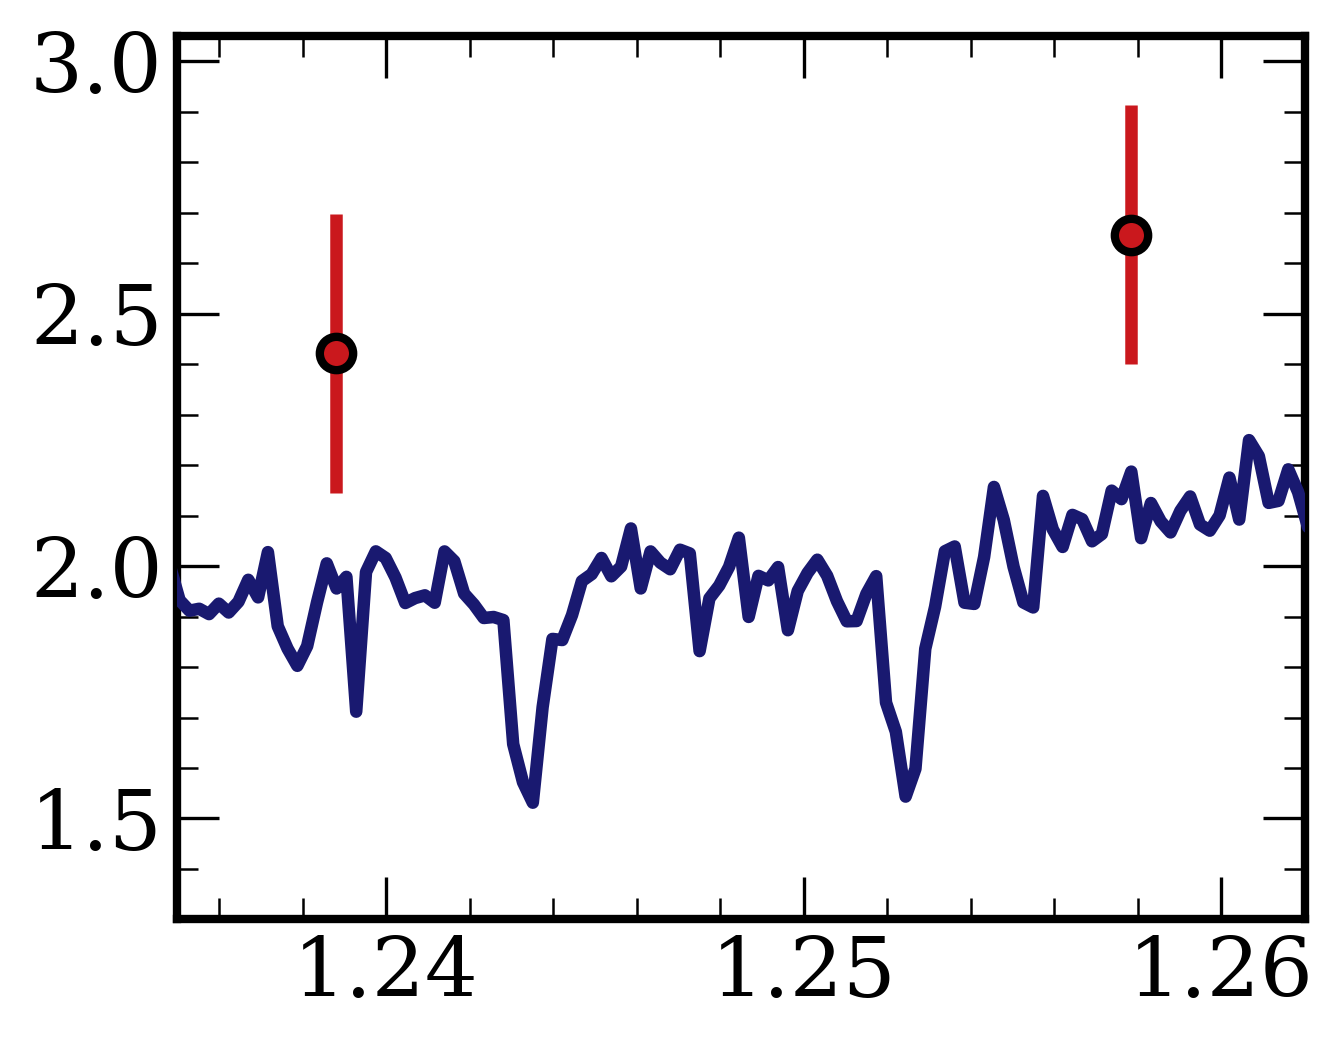

In [102]:
fig, ax = plt.subplots(figsize = (5,4))

data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["PACO_FLASSEUR_HR8799c_2016.txt"]
files["d"] = ["HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799d_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799d_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799d_2016.txt","HR8799d_SPHERE_2016.dat"]
files["e"] = ["HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits","HR8799e_SPHEREYJH_PYNPOINT_spectrum.fits","HR8799e_SPHEREYJH_ANDROMEDA_spectrum.fits","PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["PACO"] = "F20"
labels["ZURLO"] = "Z16"
labels["GREEN"] = "G18"

colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["PACO"] = "grey"
colours["ZURLO"] = "k"

qual_map = sc.ScicoSequential(cmap='Reds')
fixed_cmap = qual_map.get_mpl_color_map()
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
            continue
        elif "PYN" in f.upper():
            name = "PYNPOINT"
            continue
        elif "PACO" in f.upper():
            name = "PACO"
        else:
            name = "ZURLO"

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))
        else:
            if "PACO" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
        if name == "PACO" or name == "ZURLO":
            continue
        else:
            if planet == "d":
                wlen = wlen[:-5]
                flux = flux[:-5]
                err = err[:-5]
            spherr = err/1e-15
            sphwlen = wlen
            ax.errorbar(wlen,
                        flux/1e-15 ,
                        yerr=err/1e-15 ,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 3,
                        marker = 'o',
                        color = fixed_cmap(0.75),
                        markeredgewidth = 2,
                        alpha = 1,
                        zorder = 0)

data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
planets = ["e"]
files = {}
# "HR8799d_SPHEREYJH_KLIP_spectrum.fits",
files["c"] = ["HR8799c_GPIH_KLIP_2023_spectrum.fits","HR8799c_GPIH_PYNPOINT_spectrum.fits","HR8799c_GPIH_ANDROMEDA_spectrum.fits","HR8799c_GPI_2018.dat"]
files["d"] = ["HR8799d_GPIH_KLIP_2023_spectrum.fits","HR8799d_GPIH_PYNPOINT_spectrum.fits","HR8799d_GPIH_ANDROMEDA_spectrum.fits","HR8799d_GPI_2018.dat"]
files["e"] = ["HR8799e_GPIH_KLIP_2023_spectrum.fits","HR8799e_GPIH_PYNPOINT_spectrum.fits","HR8799e_GPIH_ANDROMEDA_spectrum.fits","HR8799e_GPI_2018.dat"]
labels = {}
labels["KLIP"] = "KLIP"
labels["PYNPOINT"] = "PynPoint"
labels["ANDROMEDA"] = "Andromeda"
labels["GREEN"] = "G18"
colours = {}
colours["KLIP"] = "tab:blue"
colours["PYNPOINT"] = "tab:orange"
colours["ANDROMEDA"] = "tab:green"
colours["GREEN"] = "k"
for i,planet in enumerate(planets):
    flist = files[planet]
    for j,f in enumerate(flist):
        name = ""
        if "KLIP" in f.upper():
            name = "KLIP"
        elif "AND" in f.upper():
            name = "ANDROMEDA"
            continue
        elif "PYN" in f.upper():
            name = "PYNPOINT"
            continue
        else:
            name = "GREEN"
            continue

        if f.endswith(".fits"):
            try:
                spec = fits.open(data_dir + f)["SPECTRUM"].data
            except FileNotFoundError:
                continue
            wlen = spec["WAVELENGTH"]
            flux = spec["FLUX"]
            err = np.sqrt(np.diag(spec["COVARIANCE"]))

            wlen = wlen[np.where(wlen<1.8)]
            flux = flux[np.where(wlen<1.8)]
            err = err[np.where(wlen<1.8)]
        else:
            if "GREEN" in f:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
            else:
                wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
                wlen = wlen[np.where(wlen<1.8)]
                flux = flux[np.where(wlen<1.8)]
                err = err[np.where(wlen<1.8)]
        if name == "GREEN":
            ax[i].errorbar(wlen,
                        flux/1e-15,
                        yerr=err/1e-15,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 2,
                        marker = 'v',
                        color = colours[name],
                        zorder = 0)
        else:
            #spherr = err/1e-15
            ax.errorbar(wlen,
                        flux/1e-15 ,
                        yerr=err/1e-15 ,
                        label = labels[name],
                        linewidth = 0,
                        elinewidth = 3,
                        marker = 'o',
                        color = fixed_cmap(0.95),
                        markeredgewidth = 2,
                        alpha = 1,
                        zorder = 0)
vwlen,vflux,verr,*_ = np.genfromtxt("VHS1256b_V2.txt",unpack=True,delimiter = ',')    
inds = np.where(vwlen<1.8) 

print(np.mean(spherr)/np.nanmean(verr[inds]/1e-15* (21.1536/10)**2))
print(np.mean(np.diff(sphwlen))/np.mean(np.diff(vwlen)))

ax.errorbar(np.array([0.955]),
            np.array([2.3]),
            yerr=np.array([np.nanmean(verr[inds]/1e-15* (21.1536/10)**2)]),
            linewidth = 1,
            elinewidth = 2,
            color = 'midnightblue',
            zorder = 8)   
ax.annotate("Mean NIRSpec\nUncertainty",(0.97,2.15), fontsize = 18)
ax.plot(vwlen[:3553],
        vflux[:3553]/1e-15 * (21.1536/10)**2,
        label = labels[name],
        linewidth = 3,
        marker = None,
        color = 'midnightblue',
        zorder = 5)
from matplotlib.lines import Line2D

"""custom_lines = [Line2D([0], [0], color=fixed_cmap(0.75), lw=4,marker = 'o',markeredgewidth = 2,alpha=1),
                Line2D([0], [0], color=fixed_cmap(0.95), lw=4,marker = 'o',markeredgewidth = 2,alpha=1),
                Line2D([0], [0], color='midnightblue', lw=1),

                ]
ax.legend(custom_lines, ["HR 8799 e, VLT/SPHERE", "HR 8799 e, Gemini/GPI", "VHS1256 b, JWST/NIRSPEC"],
             fontsize=20,
             loc = 'upper left',
             frameon = False)"""
ax.set_ylim(1.3,3.05)
ax.set_xlim(1.235,1.262)

#ax.set_xlabel("Wavelength [micron]", fontsize = 22)
#ax.set_ylabel(r'F$_{\lambda}\times10^{-15}$, [W/m$^{2}$/$\mu$m]', fontsize = 22)
plt.savefig("plots/DISCO_HR_VHS_datacomparison_inset.pdf", bbox_inches='tight')
